# Explore K-Nearest Neighbor Algorithm

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks

# Objective(Business Scenario)

predict a person as good or bad credit risk

# Introduction : Credit Risk Analysis

Credit risk

Credit Risk is the probable risk of loss resulting from a borrower's failure to repay a loan or meet contractual obligations. If a company offers credit to its client,then there is a risk that its clients may not pay their invoices.

Types of Credit Risk

Good Risk: An investment that one believes is likely to be profitable. The term most often refers to a loan made to a creditworthy person or company. Good risks are considered exceptionally likely to be repaid.

Bad Risk: A loan that is unlikely to be repaid because of bad credit history, insufficient income, or some other reason. A bad risk increases the risk to the lender and the likelihood of default on the part of the borrower.


Librarys
    - Importing Librarys
    - Importing Dataset


In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
df_credit = pd.read_csv("datasets_9109_12699_german_credit_data.csv")
df_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [2]:
### Drop unnecessary columns
df_credit=df_credit.drop(['Unnamed: 0'],axis=1)
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
# Calculate Measures of central tendency and Dispersion
df_credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


# First Look at the data:

Looking the Type of Data

Null Numbers

Unique values

The first rows of our dataset

# Analysing Missing values

In [4]:
#Searching for Missings,type of data and also known the shape of data
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB
None


As you can see, Saving accounts and Checking account has missing values

# Replace missing values

In [5]:
## Replace null values with forword and backword fill
df_credit["Saving accounts"].fillna( method ='ffill', inplace = True)
df_credit["Saving accounts"].fillna( method ='bfill', inplace = True)
df_credit["Checking account"].fillna( method ='ffill', inplace = True)
df_credit["Checking account"].fillna( method ='bfill', inplace = True)

In [6]:
#Searching for Missings,type of data and also known the shape of data
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB
None


Now as you can see, there are no null values

In [7]:
#Looking unique values
print(df_credit.nunique())
#Looking the data
print(df_credit.head())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64
   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own          little           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little         moderate           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


# Univariate Analysis

Will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually.

# Target Variable

We will first look at the target variable, i.e., Risk.

As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.



In [8]:
df_credit['Risk'].count()

1000

Size of our target variable is : 1000

In [9]:
df_credit['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

Among 1000, Risk : Good : 700, Bad : 300

In [10]:
# Normalize can be set to True to print proportions instead of number
df_credit['Risk'].value_counts(normalize=True)*100

good    70.0
bad     30.0
Name: Risk, dtype: float64

<AxesSubplot:title={'center':'Risk'}>

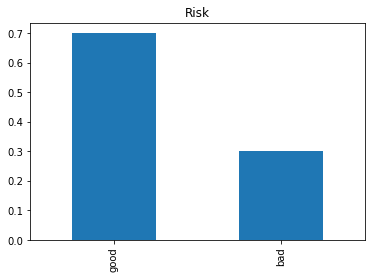

In [11]:
df_credit["Risk"].value_counts(normalize=True).plot.bar(title = 'Risk')

The Risk of 700(around 70%) people out of 1000 was Good and 300(around 30%) are Bad.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

# Independent Variables

# Analysis on "Age" variable :

C:\Users\nehag\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


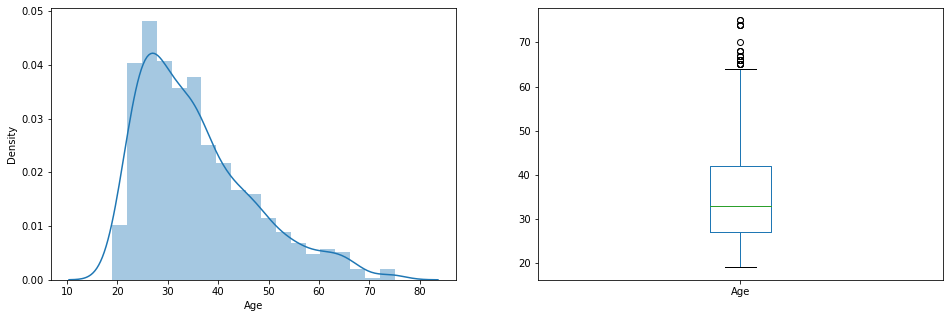

In [12]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_credit["Age"]);

plt.subplot(122)
df_credit["Age"].plot.box(figsize=(16,5))
plt.show()

# Analysis on "Sex" variable :

In [13]:
df_credit['Sex'].value_counts()

male      690
female    310
Name: Sex, dtype: int64

Among 1000, Sex : Male : 690, Female : 310

In [14]:
# Normalize can be set to True to print proportions instead of number
df_credit['Sex'].value_counts(normalize=True)*100

male      69.0
female    31.0
Name: Sex, dtype: float64

<AxesSubplot:title={'center':'Sex'}>

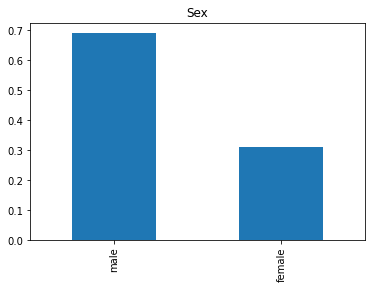

In [15]:
df_credit["Sex"].value_counts(normalize=True).plot.bar(title = 'Sex')

The Risk of 690(around 69%) people out of 1000 was Male and 310(around 31%) are Female.

# Analysis on "Job" variable :

In [16]:
df_credit['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

In [17]:
# Normalize can be set to True to print proportions instead of number
df_credit['Job'].value_counts(normalize=True)*100

2    63.0
1    20.0
3    14.8
0     2.2
Name: Job, dtype: float64

<AxesSubplot:title={'center':'Job'}>

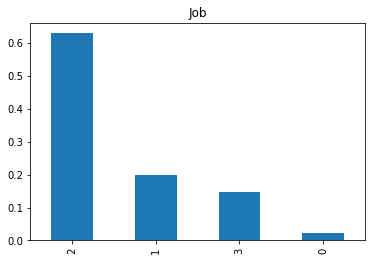

In [18]:
df_credit["Job"].value_counts(normalize=True).plot.bar(title = 'Job')

63% people have 2 level Job

20% people have 1 level Job

14.8% people have 3 level Job

2.2% people have 0 level Job

# Analysis on "Housing" variable :

In [19]:
df_credit['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [20]:
# Normalize can be set to True to print proportions instead of number
df_credit['Housing'].value_counts(normalize=True)*100

own     71.3
rent    17.9
free    10.8
Name: Housing, dtype: float64

<AxesSubplot:title={'center':'Housing'}>

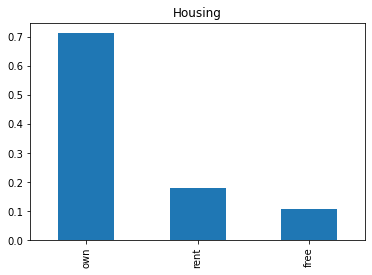

In [21]:
df_credit["Housing"].value_counts(normalize=True).plot.bar(title = 'Housing')

71.3% people have Own House

17.9% people are staying at Rent House

10.8% people are staying  at free House

# Analysis on "Saving accounts" variable :

little        741
moderate      127
quite rich     75
rich           57
Name: Saving accounts, dtype: int64
little        74.1
moderate      12.7
quite rich     7.5
rich           5.7
Name: Saving accounts, dtype: float64


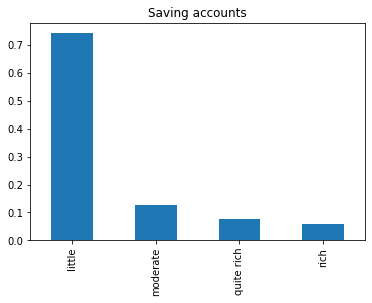

In [22]:
print(df_credit['Saving accounts'].value_counts())
df_credit["Saving accounts"].value_counts(normalize=True).plot.bar(title = 'Saving accounts')
# Normalize can be set to True to print proportions instead of number
print(df_credit['Saving accounts'].value_counts(normalize=True)*100)

74.1% people have Little Saving Accounts

12.7% people have Moderate Saving Accounts

7.5% people have quite rich Saving Accounts

5.7% people have rich Saving Accounts

# Analysis on "Checking account" variable :

moderate    459
little      452
rich         89
Name: Checking account, dtype: int64
moderate    45.9
little      45.2
rich         8.9
Name: Checking account, dtype: float64


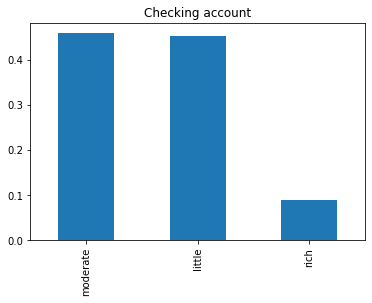

In [23]:
print(df_credit['Checking account'].value_counts())
df_credit["Checking account"].value_counts(normalize=True).plot.bar(title = 'Checking account')
# Normalize can be set to True to print proportions instead of number
print(df_credit['Checking account'].value_counts(normalize=True)*100)

45.9% people have Moderate Checking Account

45.2% people have Little Checking Account

8.9% people have rich Checking Account

# Analysis on "Credit amount" variable :

C:\Users\nehag\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


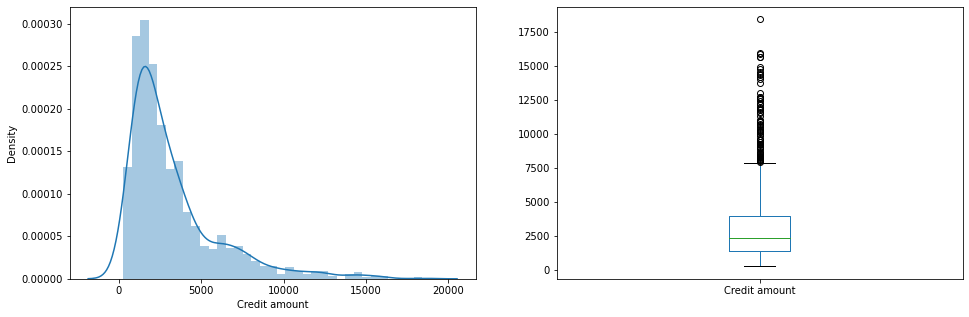

In [24]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_credit["Credit amount"]);

plt.subplot(122)
df_credit["Credit amount"].plot.box(figsize=(16,5))
plt.show()

30% of the people have 0 - 5000 Credit Amount

# Analysis on "Duration" variable :

C:\Users\nehag\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


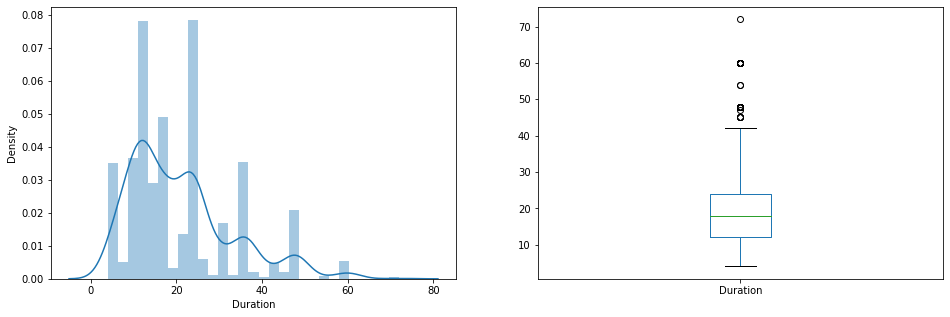

In [25]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_credit["Duration"]);

plt.subplot(122)
df_credit["Duration"].plot.box(figsize=(16,5))
plt.show()

80% of the people have 12 and 24 months Duration

# Analysis on "Purpose" variable :

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64
car                    33.7
radio/TV               28.0
furniture/equipment    18.1
business                9.7
education               5.9
repairs                 2.2
vacation/others         1.2
domestic appliances     1.2
Name: Purpose, dtype: float64


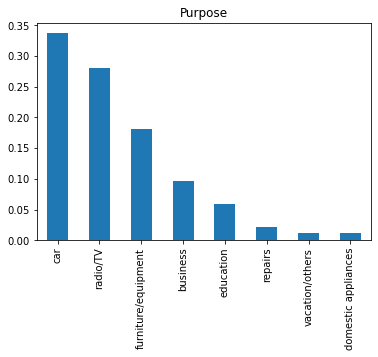

In [26]:
print(df_credit['Purpose'].value_counts())
df_credit["Purpose"].value_counts(normalize=True).plot.bar(title = 'Purpose')
# Normalize can be set to True to print proportions instead of number
print(df_credit['Purpose'].value_counts(normalize=True)*100)

33.7% people have Car loan Purpose

28% people have Radio/TV loan Purpose

18.1% people have furniture/equipment loan Purpose

9.7% people have Business loan Purpose

5.9% people have Education loan Purpose

2.2% people have Repairs loan Purpose

1.2% people have vacation/others loan Purpose

1.2% people have domestic appliances loan Purpose

# Bivariate Analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

# Independent Variables vs Target Variable

First of all we will find the relation between target variable and independent variables. Let us look at the stacked bar plot now

# Relation between "Risk" and "Age"

C:\Users\nehag\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nehag\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


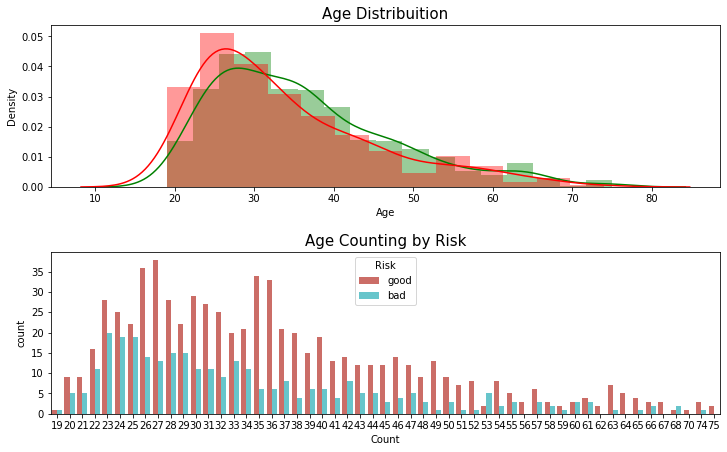

In [27]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
#g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
#plt.savefig('Age_Distribution_plot.png')
plt.show()

In [28]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features


df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

ModuleNotFoundError: No module named 'plotly'

In [ ]:
#Let's look the Credit Amount column
interval = (0,25, 40, 55, 65, 80)

cats = ['Student', 'Young', 'Middle', 'Senior','Senior-citizen']

df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)

print(pd.crosstab(df_credit["Age_cat"],df_credit["Risk"]))
Income_bin = pd.crosstab(df_credit["Age_cat"],df_credit["Risk"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(12,12))
plt.xlabel("Age_cat")
plt.ylabel("Percentage")
plt.savefig('Age_vs_Risk.jpg')
plt.show()
print(Income_bin.div(Income_bin.sum(1).astype(float),axis=0))




57% Student(19-25 Age) have Good Risk and 42% have Bad Risk

72% Young(25-40 Age) have Good Risk and 28% have Bad Risk

74% Middle Age(40-55 Age) have Good Risk and 26% have Bad Risk

74% Senior(55-65 Age) have Good Risk and 26% have Bad Risk

72% Senior-citizens(65-80 Age) have Good Risk and 28% have Bad Risk


# Relation between "Risk" and "Sex"

In [ ]:

print(pd.crosstab(df_credit["Sex"],df_credit["Risk"]))
Income_bin = pd.crosstab(df_credit["Sex"],df_credit["Risk"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(12,12))
plt.xlabel("Sex")
plt.ylabel("Percentage")
#plt.savefig('Sex_vs_Risk.jpg')
plt.show()
print(Income_bin.div(Income_bin.sum(1).astype(float),axis=0))




65% Female have Good Risk and 35% have Bad Risk

72% male have Good Risk and 28% have Bad Risk

# Relation between "Risk" and "Job"

In [ ]:

print(pd.crosstab(df_credit["Job"],df_credit["Risk"]))
Income_bin = pd.crosstab(df_credit["Job"],df_credit["Risk"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(12,12))
plt.xlabel("Job")
plt.ylabel("Percentage")
#plt.savefig('Job_vs_Risk.jpg')
plt.show()
print(Income_bin.div(Income_bin.sum(1).astype(float),axis=0))




68% Job level '0' have Good Risk and 32% bad Risk

72% Job level '1' have Good Risk and 28% bad Risk

70% Job level '2' have Good Risk and 30% bad Risk

66% Job level '3' have Good Risk and 34% bad Risk

# Relation between "Risk" and "Housing"

Risk     bad  good
Housing           
free      44    64
own      186   527
rent      70   109


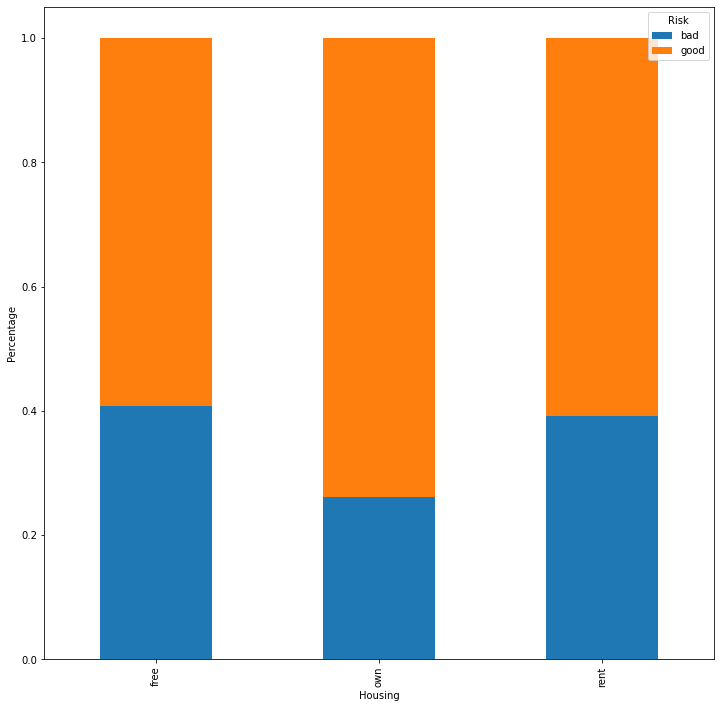

Risk          bad      good
Housing                    
free     0.407407  0.592593
own      0.260870  0.739130
rent     0.391061  0.608939


In [29]:

print(pd.crosstab(df_credit["Housing"],df_credit["Risk"]))
Income_bin = pd.crosstab(df_credit["Housing"],df_credit["Risk"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(12,12))
plt.xlabel("Housing")
plt.ylabel("Percentage")
#plt.savefig('Housing_vs_Risk.jpg')
plt.show()
print(Income_bin.div(Income_bin.sum(1).astype(float),axis=0))




59% Staying for Free have Good Risk and 40% have bad Risk

74% Staying at own House have Good Risk and 26% have bad Risk

61% Staying for Rent have Good Risk and 39% have bad Risk

# Relation between "Risk" and "Saving Accounts"

Risk             bad  good
Saving accounts           
little           241   500
moderate          37    90
quite rich        15    60
rich               7    50


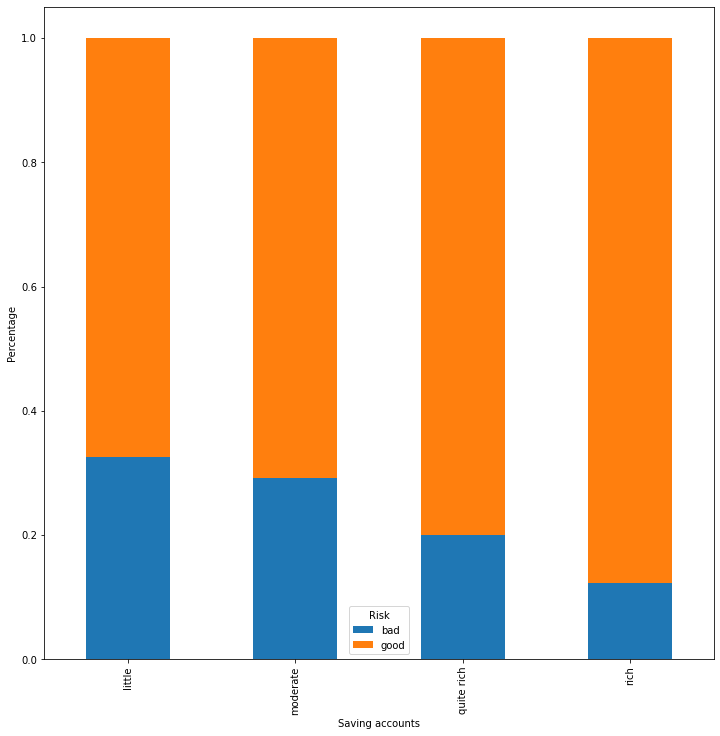

Risk                  bad      good
Saving accounts                    
little           0.325236  0.674764
moderate         0.291339  0.708661
quite rich       0.200000  0.800000
rich             0.122807  0.877193


In [30]:

print(pd.crosstab(df_credit["Saving accounts"],df_credit["Risk"]))
Income_bin = pd.crosstab(df_credit["Saving accounts"],df_credit["Risk"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(12,12))
plt.xlabel("Saving accounts")
plt.ylabel("Percentage")
#plt.savefig('Saving accounts_vs_Risk.jpg')
plt.show()
print(Income_bin.div(Income_bin.sum(1).astype(float),axis=0))




67% Little Savings Accounts have Good Risk and 33% have Bad Risk

71% Moderate Savings Accounts have Good Risk and 29% have Bad Risk

80% Quite-rich Savings Accounts have Good Risk and 20% have Bad Risk

88% Rich Savings Accounts have Good Risk and 12% have Bad Risk

# Relation between "Risk" and "Checking Account"

Risk              bad  good
Checking account           
little            154   298
moderate          129   330
rich               17    72


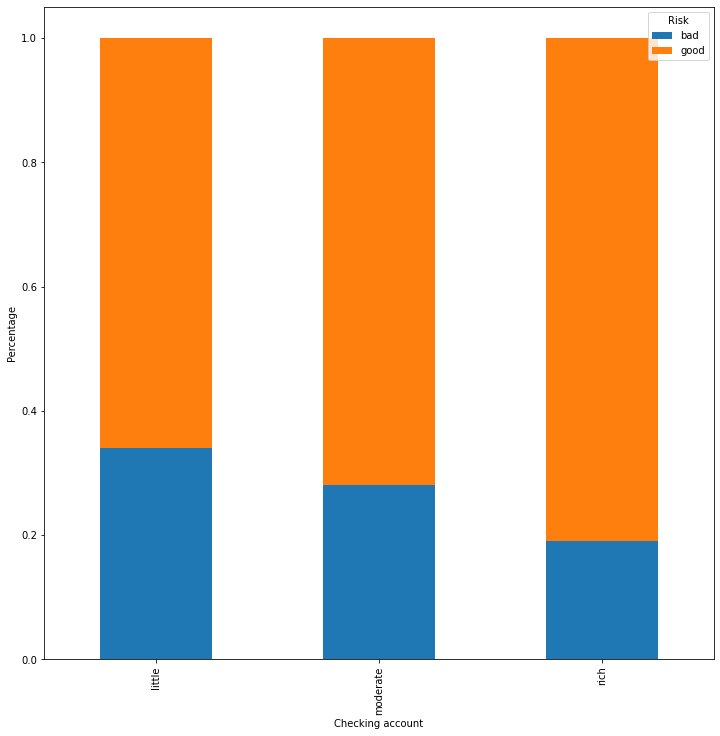

Risk                   bad      good
Checking account                    
little            0.340708  0.659292
moderate          0.281046  0.718954
rich              0.191011  0.808989


In [31]:

print(pd.crosstab(df_credit["Checking account"],df_credit["Risk"]))
Income_bin = pd.crosstab(df_credit["Checking account"],df_credit["Risk"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(12,12))
plt.xlabel("Checking account")
plt.ylabel("Percentage")
#plt.savefig('Checking account_vs_Risk.jpg')
plt.show()
print(Income_bin.div(Income_bin.sum(1).astype(float),axis=0))




66% Little Checking Account have Good Risk and 34% Bad Risk

72% Moderate Checking Account have Good Risk and 28% Bad Risk

81% Rich Checking Account have Good Risk and 19% Bad Risk

# Relation between "Risk" and "Purpose"

Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


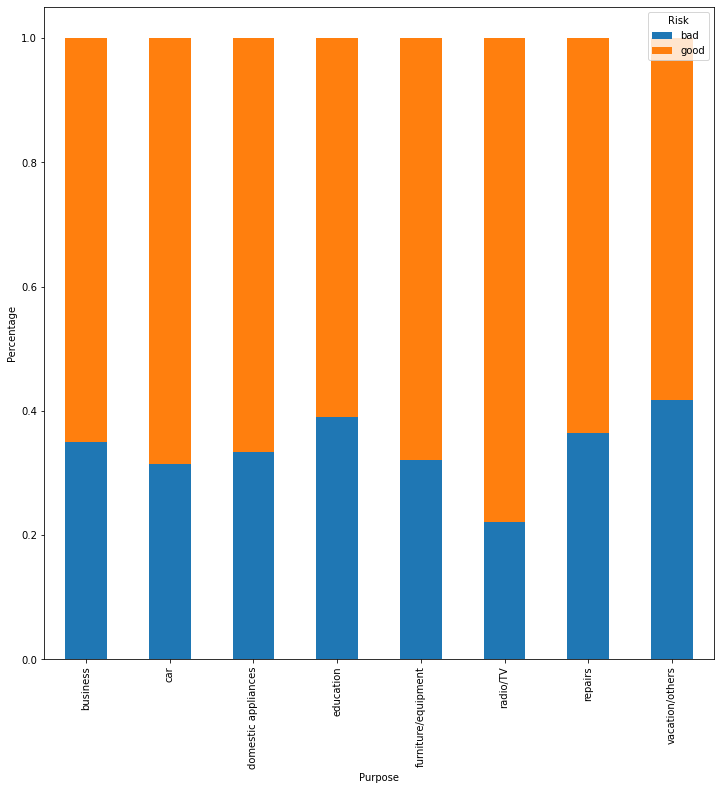

Risk                      bad      good
Purpose                                
business             0.350515  0.649485
car                  0.314540  0.685460
domestic appliances  0.333333  0.666667
education            0.389831  0.610169
furniture/equipment  0.320442  0.679558
radio/TV             0.221429  0.778571
repairs              0.363636  0.636364
vacation/others      0.416667  0.583333


In [32]:

print(pd.crosstab(df_credit["Purpose"],df_credit["Risk"]))
Income_bin = pd.crosstab(df_credit["Purpose"],df_credit["Risk"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(12,12))
plt.xlabel("Purpose")
plt.ylabel("Percentage")
#plt.savefig('Purpose_vs_Risk.jpg')
plt.show()
print(Income_bin.div(Income_bin.sum(1).astype(float),axis=0))




65% Business Purpose loans have Good Risk and 35% Bad Risk

69% Car Purpose loans have Good Risk and 31% Bad Risk

67% domestic appliances Purpose loans have Good Risk and 33% Bad Risk

61% Education Purpose loans have Good Risk and 38% Bad Risk

68% furniture/equipment Purpose loans have Good Risk and 32% Bad Risk

78% radio/TV Purpose loans have Good Risk and 22% Bad Risk

64% repairs Purpose loans have Good Risk and 36% Bad Risk

58% vacation/others Purpose loans have Good Risk and 42% Bad Risk

# Relation between "Risk" and "Credit Amount"

C:\Users\nehag\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nehag\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


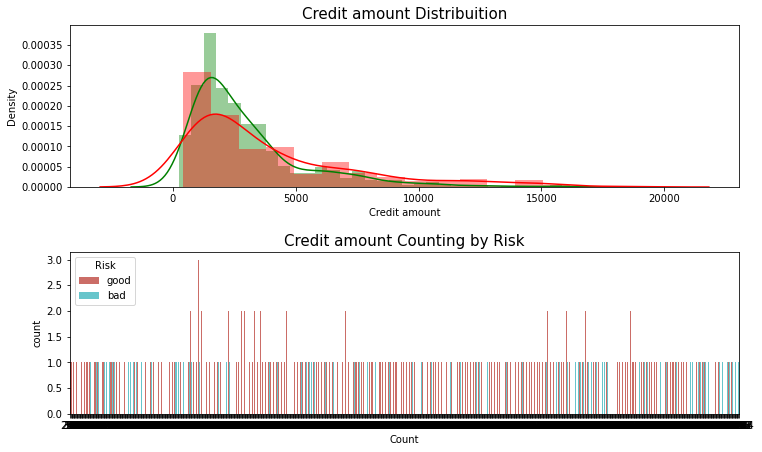

In [33]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Credit amount"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Credit amount"], ax=ax[0], 
             color='r')
g1.set_title("Credit amount Distribuition", fontsize=15)
g1.set_xlabel("Credit amount")
#g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Credit amount",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Credit amount Counting by Risk", fontsize=15)
g2.set_xlabel("Credit amount")
g2.set_xlabel("Count")
#plt.savefig('Credit amount_Distribution_plot.png')
plt.show()

In [34]:
bins=[0,5000,10000,15000,20000]
group=['Low','Average','High', 'Very high']
df_credit['Credit_amount_bin']=pd.cut(df_credit['Credit amount'],bins,labels=group)

Risk               bad  good
Credit_amount_bin           
Low                222   590
Average             54    94
High                21    14
Very high            3     2


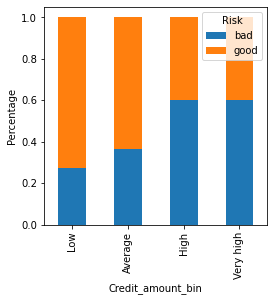

Risk                    bad      good
Credit_amount_bin                    
Low                0.273399  0.726601
Average            0.364865  0.635135
High               0.600000  0.400000
Very high          0.600000  0.400000


In [35]:
print(pd.crosstab(df_credit["Credit_amount_bin"],df_credit["Risk"]))
Income_bin = pd.crosstab(df_credit["Credit_amount_bin"],df_credit["Risk"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_amount_bin")
plt.ylabel("Percentage")
plt.show()
print(Income_bin.div(Income_bin.sum(1).astype(float),axis=0))

73% Low(0- 5000) Credit Amount have Good Risk and 27% Bad Risk

64% Average(5000- 10000) Credit Amount have Good Risk and 36% Bad Risk

40% High(10000- 15000) Credit Amount have Good Risk and 60% Bad Risk

40% Very High(15000- 20000) Credit Amount have Good Risk and 60% Bad Risk

# Relation between "Risk" and "Duration"

In [36]:
bins=[0,12,24,36,48,60,72]
group=['1-year','2-year','3-year', '4-year','5-year','6-year']
df_credit['Duration_bin']=pd.cut(df_credit['Duration'],bins,labels=group)

Risk          bad  good
Duration_bin           
1-year         76   283
2-year        122   289
3-year         57    86
4-year         37    34
5-year          7     8
6-year          1     0


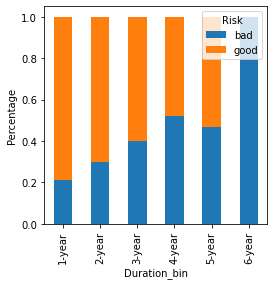

Risk               bad      good
Duration_bin                    
1-year        0.211699  0.788301
2-year        0.296837  0.703163
3-year        0.398601  0.601399
4-year        0.521127  0.478873
5-year        0.466667  0.533333
6-year        1.000000  0.000000


In [37]:
print(pd.crosstab(df_credit["Duration_bin"],df_credit["Risk"]))
Income_bin = pd.crosstab(df_credit["Duration_bin"],df_credit["Risk"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Duration_bin")
plt.ylabel("Percentage")
plt.show()
print(Income_bin.div(Income_bin.sum(1).astype(float),axis=0))

79% Duration(6-12 Months) have Good Risk and 21% Bad Risk

70% Duration(12-24 Months) have Good Risk and 30% Bad Risk

60% Duration(24-36 Months) have Good Risk and 40% Bad Risk

48% Duration(36-48 Months) have Good Risk and 52% Bad Risk

53% Duration(48-60 Months) have Good Risk and 47% Bad Risk

0% Duration(60-72 Months) have Good Risk and 100% Bad Risk

In [38]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                1000 non-null   int64   
 1   Sex                1000 non-null   object  
 2   Job                1000 non-null   int64   
 3   Housing            1000 non-null   object  
 4   Saving accounts    1000 non-null   object  
 5   Checking account   1000 non-null   object  
 6   Credit amount      1000 non-null   int64   
 7   Duration           1000 non-null   int64   
 8   Purpose            1000 non-null   object  
 9   Risk               1000 non-null   object  
 10  Credit_amount_bin  1000 non-null   category
 11  Duration_bin       1000 non-null   category
dtypes: category(2), int64(4), object(6)
memory usage: 80.6+ KB


In [39]:
######## Drop Binned variables
df_credit=df_credit.drop(['Age_cat','Credit_amount_bin','Duration_bin'],axis=1)

KeyError: "['Age_cat'] not found in axis"

In [ ]:
df_credit.info()

In [40]:
# Map risk column good to 0 and bad to 1
df_credit['Risk'] = df_credit['Risk'].map({'bad':1, 'good':0})

# Transforming the data into Dummy variables

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare.

Let us understand the process of dummies first:

In [41]:
cat_features=['Sex','Housing','Saving accounts','Checking account','Purpose']
num_features=['Age','Credit amount','Duration','Risk','Job']
for variable in cat_features:
    dummies = pd.get_dummies(df_credit[cat_features])
    df1= pd.concat([df_credit[num_features], dummies],axis=1)
    
#df1['Age'] = np.log(df1['Age'])
#df1['Credit amount'] = np.log(df1['Credit amount'])
#df1['Duration'] = np.log(df1['Duration'])
Risk= df1['Risk']          
df2=df1.drop(['Risk'],axis=1)


In [42]:
df1.shape

(1000, 25)

In [43]:
df1.head()

,Age,Credit amount,Duration,Risk,Job,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1169,6,0,2,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,5951,48,1,2,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,2096,12,0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,45,7882,42,0,2,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,4870,24,1,2,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
df2.shape

(1000, 24)

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Credit amount                1000 non-null   int64
 2   Duration                     1000 non-null   int64
 3   Job                          1000 non-null   int64
 4   Sex_female                   1000 non-null   uint8
 5   Sex_male                     1000 non-null   uint8
 6   Housing_free                 1000 non-null   uint8
 7   Housing_own                  1000 non-null   uint8
 8   Housing_rent                 1000 non-null   uint8
 9   Saving accounts_little       1000 non-null   uint8
 10  Saving accounts_moderate     1000 non-null   uint8
 11  Saving accounts_quite rich   1000 non-null   uint8
 12  Saving accounts_rich         1000 non-null   uint8
 13  Checking account_little      1000 non-null   uint

# Correlation:

In [46]:
corr=pd.DataFrame(df1.corr())
corr
#corr.to_csv('corr_matrix.csv',index=False)

,Age,Credit amount,Duration,Risk,Job,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
Age,1.000000,0.032716,-0.036136,-0.091127,0.015673,-0.161694,0.161694,0.253058,0.006553,-0.212620,...,-0.029407,0.034720,-0.001772,0.099919,-0.012562,0.060390,-0.127657,-0.046401,0.039567,0.042365
Credit amount,0.032716,1.000000,0.624984,0.154739,0.285385,-0.093482,0.093482,0.201643,-0.117497,-0.024611,...,0.081932,-0.089859,0.103016,0.125575,-0.069268,-0.034796,-0.034037,-0.173203,-0.028875,0.192893
Duration,-0.036136,0.624984,1.000000,0.214927,0.210910,-0.081432,0.081432,0.189117,-0.075169,-0.064417,...,0.055531,-0.061588,0.164113,-0.005320,-0.037212,-0.025450,-0.062804,-0.044319,-0.022549,0.104516
Risk,-0.091127,0.154739,0.214927,1.000000,0.032735,0.075493,-0.075493,0.081556,-0.134589,0.092785,...,-0.038098,-0.074337,0.036129,0.022621,0.008016,0.049085,0.020971,-0.106922,0.020828,0.028058
Job,0.015673,0.285385,0.210910,0.032735,1.000000,-0.070298,0.070298,0.134972,-0.059393,-0.039195,...,0.000197,-0.040082,0.001614,0.036762,-0.025979,-0.021672,0.013422,-0.027683,-0.092751,0.100544
Sex_female,-0.161694,-0.093482,-0.081432,0.075493,-0.070298,1.000000,-1.000000,-0.100872,-0.119638,0.222845,...,-0.005597,0.003113,-0.080875,-0.047893,0.045275,0.052397,0.100467,-0.008668,-0.026828,-0.014297
Sex_male,0.161694,0.093482,0.081432,-0.075493,0.070298,-1.000000,1.000000,0.100872,0.119638,-0.222845,...,0.005597,-0.003113,0.080875,0.047893,-0.045275,-0.052397,-0.100467,0.008668,0.026828,0.014297
Housing_free,0.253058,0.201643,0.189117,0.081556,0.134972,-0.100872,0.100872,1.000000,-0.548445,-0.162474,...,-0.048957,-0.006925,-0.059613,0.126806,-0.038348,0.117976,-0.071530,-0.109357,0.013706,0.080010
Housing_own,0.006553,-0.117497,-0.075169,-0.134589,-0.059393,-0.119638,0.119638,-0.548445,1.000000,-0.735968,...,0.052050,0.011979,0.051083,-0.099526,0.029317,-0.075684,-0.040496,0.134705,0.019803,-0.011288
Housing_rent,-0.212620,-0.024611,-0.064417,0.092785,-0.039195,0.222845,-0.222845,-0.162474,-0.735968,1.000000,...,-0.021782,-0.008529,-0.012013,0.014773,-0.003546,-0.006211,0.105700,-0.070414,-0.034465,-0.051460


# Model Building :

# K-Nearest neighbors Model Fitting

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

In [47]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.neighbors import KNeighborsClassifier


In [48]:
# Spliting data into train and test version
X_train, X_test, y_train, y_test = train_test_split(df2, Risk, test_size = 0.30, random_state=42)

In [49]:
y_train.shape

(700,)

In [222]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

Predicting the test dataset results and calculating the accuracy

In [223]:
y_pred = classifier.predict(X_test)
print('\nAccuracy of K-nearest Neighbor classifier on test set: {:.2f}'.format(accuracy_score(y_pred,y_test)))


Accuracy of K-nearest Neighbor classifier on test set: 0.68


# Assessing the Efficiency and Performance

Accuracy of K-nearest Neighbor classifier on test set: 0.68

# Confusion Matrix

In [224]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",confusion_matrix)

Confusion Matrix: 
 [[194  15]
 [ 80  11]]


The result is telling us that we have 184+20 correct predictions and 25+71 incorrect predictions

# Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       209
           1       0.44      0.22      0.29        91

    accuracy                           0.68       300
   macro avg       0.58      0.55      0.54       300
weighted avg       0.64      0.68      0.64       300



# Interpretation:

Of the entire test set, 64% of the customer’s preferred good credit risk that were promoted.

